In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("CTG.csv")

In [ ]:
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/96,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/96,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/96,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/96,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/96,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


## FileName:	of CTG examination	
## Date:	of the examination	
## b:	start instant	
## e:	end instant	
## LBE:	baseline value (medical expert)	
## LB:	baseline value (SisPorto)	
## AC:	accelerations (SisPorto)	
## FM:	foetal movement (SisPorto)	
## UC:	uterine contractions (SisPorto)	
## ASTV:	percentage of time with abnormal short term variability  (SisPorto)	
## mSTV:	mean value of short term variability  (SisPorto)	
## ALTV:	percentage of time with abnormal long term variability  (SisPorto)	
## mLTV:	mean value of long term variability  (SisPorto)	
## DL:	light decelerations	
## DS:	severe decelerations	
## DP:	prolongued decelerations	
## DR:	repetitive decelerations	
## Width:	histogram width	
## Min:	low freq. of the histogram	
## Max:	high freq. of the histogram	
## Nmax:	number of histogram peaks	
## Nzeros:	number of histogram zeros	
## Mode:	histogram mode	
## Mean:	histogram mean	
## Median:	histogram median	
## Variance:	histogram variance	
## Tendency:	histogram tendency: -1=left assymetric; 0=symmetric; 1=right assymetric	
## A:	calm sleep	
## B:	REM sleep	
## C:	calm vigilance	
## D:	active vigilance	
## SH:	shift pattern (A or Susp with shifts)	
## AD:	accelerative/decelerative pattern (stress situation)	
## DE:	decelerative pattern (vagal stimulation)	
## LD:	largely decelerative pattern	
## FS:	flat-sinusoidal pattern (pathological state)	
## SUSP:	suspect pattern	
## CLASS:	Class code (1 to 10) for classes A to SUSP	
## NSP:	Normal=1; Suspect=2; Pathologic=3	


In [ ]:
df=df.drop(["FileName","Date","SegFile","b","e"],axis=1) #original columns droped by parent paper 

In [ ]:
df.head()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [ ]:
df.columns

Index(['LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL',
       'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
       'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD',
       'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP'],
      dtype='object')

In [ ]:
df.shape 

(2129, 35)

In [ ]:
df.isnull().sum() #finding the amount of NA's that are present within our data set 

LBE         3
LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
DR          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
A           3
B           3
C           3
D           3
E           3
AD          3
DE          3
LD          3
FS          3
SUSP        3
CLASS       3
NSP         3
dtype: int64

In [ ]:
df=df.dropna() #dropping the NA's

In [ ]:
df.isnull().sum()

LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

In [ ]:
df.dtypes #looking at our types of variables 

LBE         float64
LB          float64
AC          float64
FM          float64
UC          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
DL          float64
DS          float64
DP          float64
DR          float64
Width       float64
Min         float64
Max         float64
Nmax        float64
Nzeros      float64
Mode        float64
Mean        float64
Median      float64
Variance    float64
Tendency    float64
A           float64
B           float64
C           float64
D           float64
E           float64
AD          float64
DE          float64
LD          float64
FS          float64
SUSP        float64
CLASS       float64
NSP         float64
dtype: object

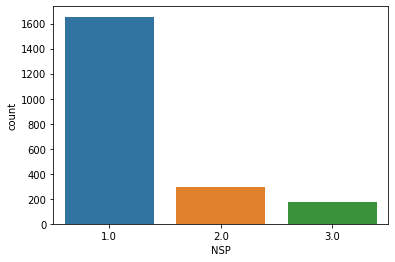

In [ ]:
#Looking at how many 1, 2, and 3 NSP there are in our data 
sns.countplot(data= df, x="NSP")

You can see here that there are around 1600 normal, 300 suspect, and 200 pathological cases

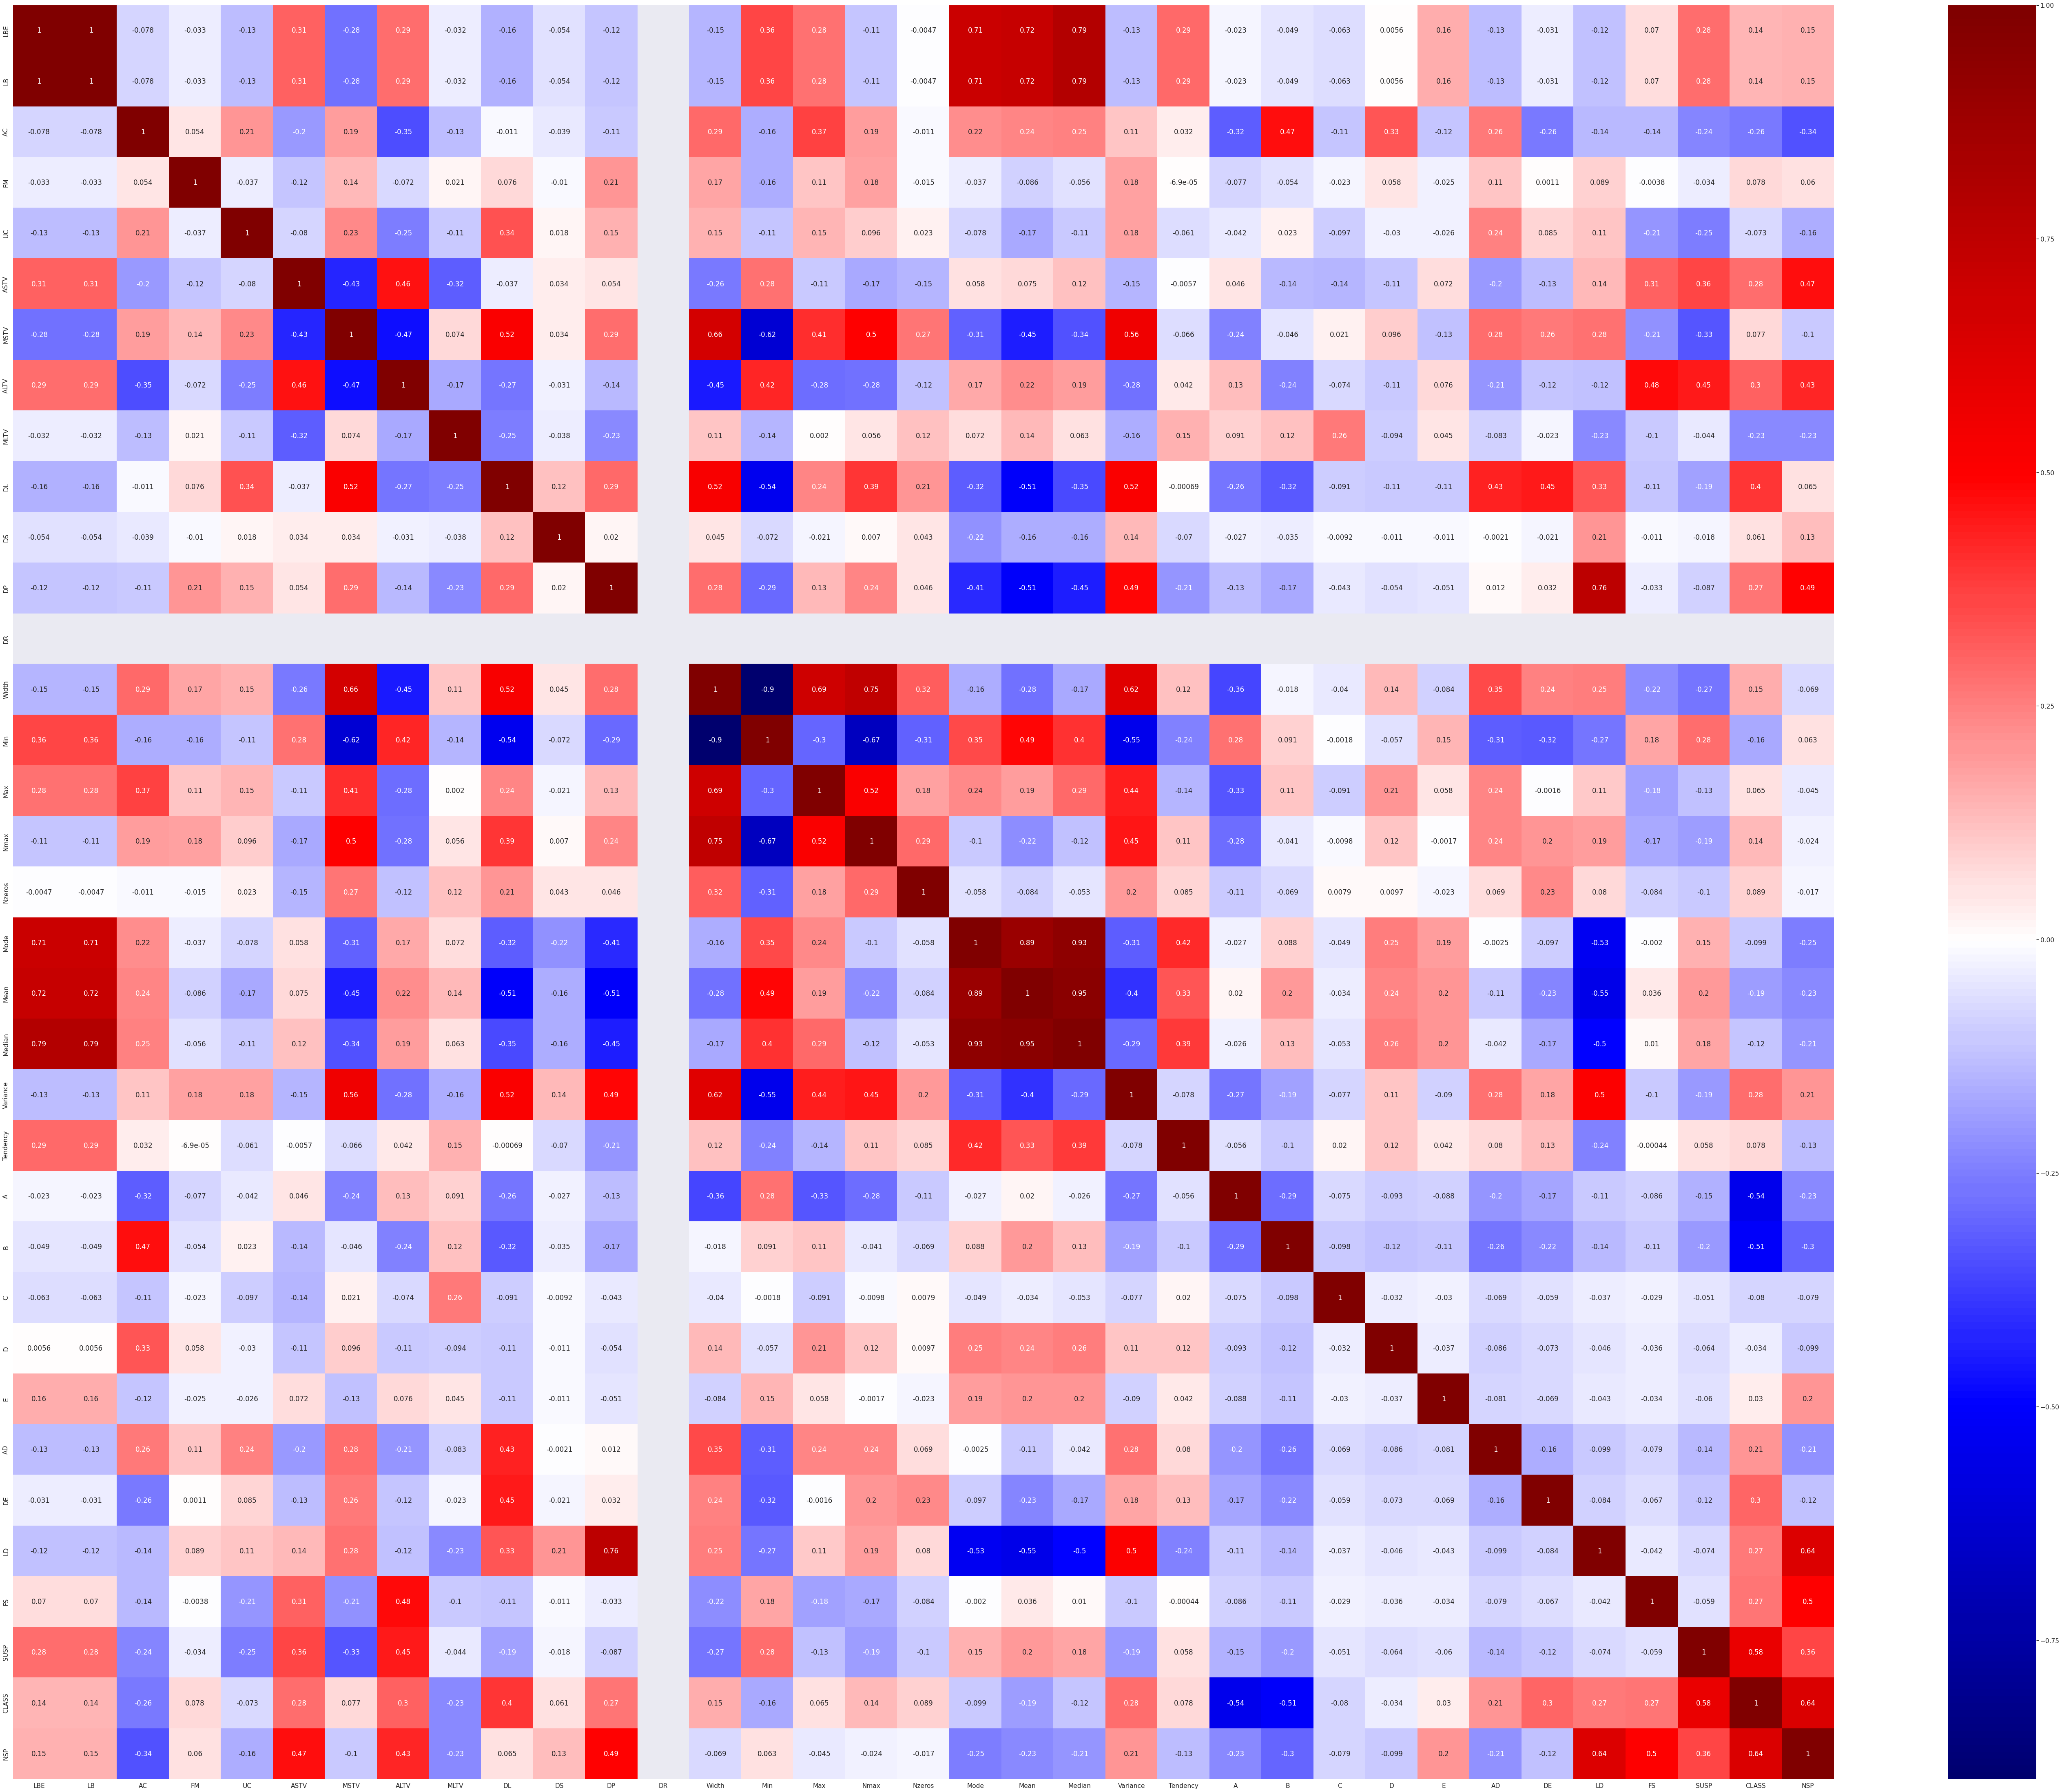

In [ ]:
#creating a correlation heat map of our data 
corrmat= df.corr()
plt.figure(figsize=(100,80))  
sns.set(font_scale=1.4)

sns.heatmap(corrmat,annot=True, cmap= 'seismic',center=0)

Based on high correlation shown in the correlation heat maps, we will be looking at the following attributes in depth : CLASS, FS, LD, DP, ASTV, ALTV, AC

In [ ]:
#Using our new varibales based on the heat map 
X=df[['CLASS', 'FS', 'LD',
      'DP', 'ASTV', 'ALTV', 'AC']]
Y=df[["NSP"]]

## Peforming the scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
Scaler=StandardScaler()
X=Scaler.fit_transform(X)


In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

## Classifiying the NSP into, Normal=1; Suspect=2; Pathologic=3

### CHecking for appropriate values of gamma

In [ ]:
from sklearn.svm import SVC

svm_clf=SVC(kernel="poly",degree=6,coef0=5,gamma=0.1)
svm_clf=svm_clf.fit(X_train,y_train)
y_pred=svm_clf.predict(X_test)


## Calculating different metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[490   6   0]
 [  4  97   0]
 [  0   1  40]]


In [ ]:
f1_score(y_test,y_pred,average='weighted')

0.982859269522368

In [ ]:

accuracy_score(y_test,y_pred)

0.9827586206896551

In [ ]:
precision_score(y_test,y_pred,average='weighted')

0.98304973157514

In [ ]:
recall_score(y_test,y_pred,average="weighted")

0.9827586206896551

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_clf=DecisionTreeClassifier(min_samples_split=6, min_samples_leaf=4, max_depth=6, )
tree_clf=tree_clf.fit(X_train,y_train)
y_pred=tree_clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9890282131661442

In [ ]:
recall_score(y_test,y_pred,average="weighted")

0.9890282131661442

In [ ]:
precision_score(y_test,y_pred,average='weighted')

0.9890063703088215

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
tree_clf, out_file="tree.dot",
feature_names=['CLASS', 'SUSP', 'LD',
      'DP', 'ASTV', 'ALTV', 'AC'],
class_names="NSP",
rounded=True,
filled=True)

In [ ]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

# Using the ensemble technique

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

In [ ]:
svm_clf=SVC(kernel="poly",degree=6,coef0=5,gamma=0.1,probability=True)
decision_tree=DecisionTreeClassifier(min_samples_split=6, min_samples_leaf=4, max_depth=6)
rnd_clf=RandomForestClassifier()
voting_clf=VotingClassifier(estimators=[("svm",svm_clf),('rf',rnd_clf),("decision_tree",decision_tree)],voting="hard")

In [ ]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(coef0=5, degree=6, gamma=0.1, kernel='poly',
                                  probability=True)),
                             ('rf', RandomForestClassifier()),
                             ('decision_tree',
                              DecisionTreeClassifier(max_depth=6,
                                                     min_samples_leaf=4,
                                                     min_samples_split=6))])

In [ ]:
for clf in (rnd_clf, svm_clf,decision_tree, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.9827586206896551
SVC 0.9827586206896551
DecisionTreeClassifier 0.9890282131661442
VotingClassifier 0.9890282131661442


## As, we can observe that there is a slight increase in the overall acuracy while using the ensemble model.

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,n_jobs=-1,max_samples=100, bootstrap=True)

In [ ]:
bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.9780564263322884


In [ ]:
##This accuracy is better than our previous decision tree model
##Therefore, we will again call ensemble technique.

In [ ]:
voting_clf=VotingClassifier(estimators=[("svm",svm_clf),('rf',rnd_clf),("bagging_clf",bag_clf)],voting="hard")

In [ ]:
for clf in (rnd_clf, svm_clf,bag_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.9843260188087775
SVC 0.9827586206896551
BaggingClassifier 0.9780564263322884
VotingClassifier 0.987460815047022


In [ ]:
##Using trial and hit method, and performing out-of-box evaluation
##Since a predictor never sees the oob instances during training, it can be evaluated on these instances,
##without the need for a separate validation set or cross-validation. You can evaluate the ensemble itself by
##averaging out the oob evaluations of each predictor.

In [ ]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,n_jobs=-1,max_samples=100, bootstrap=True,oob_score=True)
bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)
print(bag_clf.oob_score_)
print(accuracy_score(y_test,y_pred))

0.9737903225806451
0.9780564263322884


# Applying the ADAboost 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_clf=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=1000,learning_rate=0.1)

In [ ]:
ada_clf.fit(X_train,y_train)
y_pred=ada_clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.9294670846394985


# Applying XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb_clf=XGBClassifier(learning_rate=0.001)
xgb_clf.fit(X_train,y_train)
y_pred=xgb_clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.9843260188087775


In [ ]:
voting_clf=VotingClassifier(estimators=[("svm",svm_clf),("xgb_clf",xgb_clf)],voting="hard")


In [ ]:
for clf in (svm_clf,xgb_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.9827586206896551
XGBClassifier 0.9843260188087775
VotingClassifier 0.9827586206896551
